# Programming Assignment: Градиентный бустинг над решающими деревьями

Данное задание основано на материалах лекций по композициям алгоритмов.

## Вы научитесь:

* работать с градиентным бустингом и подбирать его гиперпараметры
* сравнивать разные способы построения композиций
* понимать, в каком случае лучше использовать случайный лес, а в каком — градиентный бустинг
* использовать метрику log-loss

## Введение

Построение композиции — важный подход в машинном обучении, который позволяет объединять большое количество слабых алгоритмов в один сильный. Данный подход широко используется на практике в самых разных задачах.

На лекциях был рассмотрен метод градиентного бустинга, который последовательно строит композицию алгоритмов, причем каждый следующий алгоритм выбирается так, чтобы исправлять ошибки уже имеющейся композиции. Обычно в качестве базовых алгоритмов используют деревья небольшой глубины, поскольку их достаточно легко строить, и при этом они дают нелинейные разделяющие поверхности.

Другой метод построения композиций — случайный лес. В нем, в отличие от градиентного бустинга, отдельные деревья строятся независимо и без каких-либо ограничений на глубину — дерево наращивается до тех пор, пока не покажет наилучшее качество на обучающей выборке.

В этом задании мы будем иметь дело с задачей классификации. В качестве функции потерь будем использовать `log-loss`:

![Image](https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/jpOJsbuLEeWW3xLV17cwNw_17df306ae15f2c7a9f7289565c55dea3_logloss.png?expiry=1576281600000&hmac=YAuBli61T1AT0rs5soo76ESAFJbHP0TAbUuECEbvuoY)

Здесь через `y` обозначен истинный ответ, через `z` — прогноз алгоритма. Данная функция является дифференцируемой, и поэтому подходит для использования в градиентном бустинге. Также можно показать, что при ее использовании итоговый алгоритм будет приближать истинные вероятности классов.

## Реализация в sklearn

В пакете `scikit-learn` градиентный бустинг реализован в модуле `ensemble` в виде классов [GradientBoostingClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) и [GradientBoostingRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html). Основные параметры, которые будут интересовать нас: `n_estimators`, `learning_rate`. Иногда может быть полезен параметр `verbose` для отслеживания процесса обучения.

Чтобы была возможность оценить качество построенной композиции на каждой итерации, у класса есть метод [staged_decision_function](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier.staged_decision_function). Для заданной выборки он возвращает ответ на каждой итерации.

Помимо алгоритмов машинного обучения, в пакете `scikit-learn` представлено большое число различных инструментов. В этом задании будет предложено воспользоваться функцией [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) модуля `cross_validation`. С помощью нее можно разбивать выборки случайным образом. На вход можно передать несколько выборок (с условием, что они имеют одинаковое количество строк). Пусть, например, имеются данные `X` и `y`, где `X` — это признаковое описание объектов, `y` — целевое значение. Тогда следующий код будет удобен для разбиения этих данных на обучающее и тестовое множества:

Обратите внимание, что при фиксированном параметре `random_state` результат разбиения можно воспроизвести.

Метрика [log-loss](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html) реализована в пакете `metrics`: [sklearn.metrics.log_loss](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html). Заметим, что данная метрика предназначена для классификаторов, выдающих оценку принадлежности классу, а не бинарные ответы. И градиентный бустинг, и случайный лес умеют строить такие прогнозы — для этого нужно использовать метод `predict_proba`:

Метод `predict_proba` возвращает матрицу, i-й столбец которой содержит оценки принадлежности i-му классу.

Для рисования кривых качества на обучении и контроле можно воспользоваться следующим кодом:

## Материалы

[Подробнее о градиентном бустинге и особенностях его применения к деревьям](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture09-ensembles.pdf)

## Данные

В рамках данного задания мы рассмотрим датасет с конкурса [Predicting a Biological Response](https://www.kaggle.com/c/bioresponse).

## Инструкция по выполнению

### Шаг 1:

Загрузите выборку из файла `gbm-data.csv` с помощью `pandas` и преобразуйте ее в массив numpy (параметр `values` у датафрейма). В первой колонке файла с данными записано, была или нет реакция. Все остальные колонки (`d1 - d1776`) содержат различные характеристики молекулы, такие как размер, форма и т.д. Разбейте выборку на обучающую и тестовую, используя функцию `train_test_split` с параметрами `test_size = 0.8` и `random_state = 241`.

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
def write_answer(ans, n):
    with open("ans{}.txt".format(n), "w") as fout:
        fout.write(str(ans))

In [3]:
data = pd.read_csv('gbm-data.csv')
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

### Шаг 2:

Обучите `GradientBoostingClassifier` с параметрами `n_estimators=250`, `verbose=True`, `random_state=241` и для каждого значения `learning_rate` из списка [1, 0.5, 0.3, 0.2, 0.1] проделайте следующее:

* Используйте метод `staged_decision_function` для предсказания качества на обучающей и тестовой выборке на каждой итерации.
* Преобразуйте полученное предсказание с помощью сигмоидной функции по формуле $1 / (1 + e^{−y_{pred}})$, где $y_{pred}$ — предсказанное значение.
* Вычислите и постройте график значений `log-loss` (которую можно посчитать с помощью функции `sklearn.metrics.log_loss`) на обучающей и тестовой выборках, а также найдите минимальное значение метрики и номер итерации, на которой оно достигается.

      Iter       Train Loss   Remaining Time 
         1           1.0190           10.96s
         2           0.9192           11.04s
         3           0.8272            9.88s
         4           0.7834            8.86s
         5           0.7109            8.67s
         6           0.6368            9.31s
         7           0.5797            9.17s
         8           0.5610            8.59s
         9           0.5185            8.44s
        10           0.4984            8.06s
        20           0.1999            7.82s
        30           0.1313            6.85s
        40           0.0790            6.43s
        50           0.0511            6.15s
        60           0.0352            5.85s
        70           0.0245            5.44s
        80           0.0162            5.10s
        90           0.0114            4.76s
       100           0.0077            4.46s
       200           0.0004            1.41s

min log-loss: 0.5822942594278476 
the number of itera

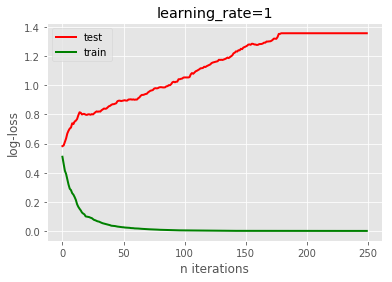

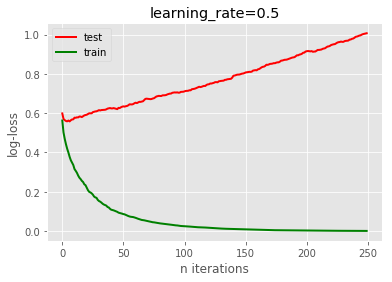

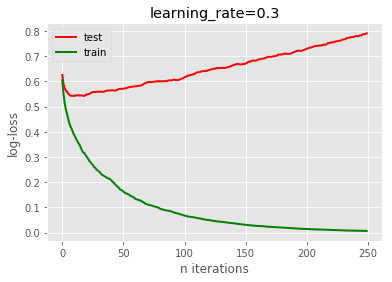

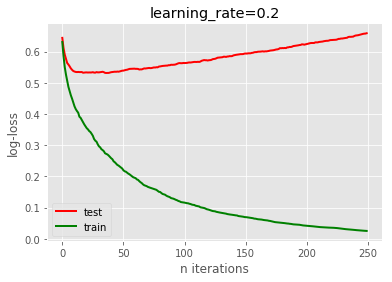

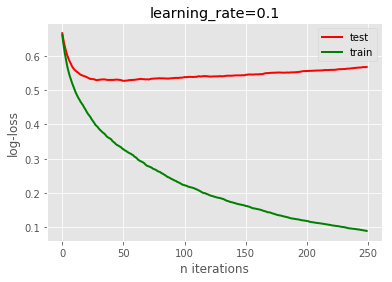

In [6]:
def sigma(y):
    return 1 / (1 + np.exp(-y))

log_los = {}
for rate in [1, 0.5, 0.3, 0.2, 0.1]:
    clf = GradientBoostingClassifier(learning_rate=rate, n_estimators=250, verbose=True, random_state=241)
    clf.fit(X_train, y_train)
    
    y_pred_train = list(map(sigma, clf.staged_decision_function(X_train)))
    y_pred_test = list(map(sigma, clf.staged_decision_function(X_test)))
    
    train_loss = np.array([log_loss(y_train, y_pred) for y_pred in y_pred_train])
    test_loss = np.array([log_loss(y_test, y_pred) for y_pred in y_pred_test])
    
    log_los[rate] =  [min(test_loss), np.argmin(test_loss) + 1]
    print('\nmin log-loss:', log_los[rate][0],'\nthe number of iteration:', log_los[rate][1],'\n')       
    
    plt.figure()
    plt.plot(test_loss, 'r', linewidth=2)
    plt.plot(train_loss, 'g', linewidth=2)
    plt.xlabel('n iterations')
    plt.ylabel('log-loss')
    plt.title('learning_rate={}'.format(rate))
    plt.legend(['test', 'train'])

### Шаг 3: 
Как можно охарактеризовать график качества на тестовой выборке, начиная с некоторой итерации: переобучение (`overfitting`) или недообучение (`underfitting`)? В ответе укажите одно из слов `overfitting` либо `underfitting`.

In [7]:
write_answer('overfitting', 1)

### Шаг 4:

Приведите минимальное значение `log-loss` на тестовой выборке и номер итерации, на котором оно достигается, при `learning_rate = 0.2`.

In [8]:
print(*log_los[0.2])
write_answer(str(log_los[0.2][0])+' '+str(log_los[0.2][1]), 2)

0.5314507963190638 37


### Шаг 5:

На этих же данных обучите `RandomForestClassifier` с количеством деревьев, равным количеству итераций, на котором достигается наилучшее качество у градиентного бустинга из предыдущего пункта, c `random_state=241` и остальными параметрами по умолчанию. Какое значение `log-loss` на тесте получается у этого случайного леса? (Не забывайте, что предсказания нужно получать с помощью функции predict_proba. В данном случае брать сигмоиду от оценки вероятности класса не нужно)

In [9]:
clf = RandomForestClassifier(n_estimators=log_los[0.2][1], random_state=241)
clf.fit(X_train, y_train)

y_pred = clf.predict_proba(X_test)
loss = log_loss(y_test, y_pred)

print(loss)
write_answer(loss, 3)

0.5410941951182815


Если ответом является нецелое число, то целую и дробную часть необходимо разграничивать точкой, например, 0.42. При необходимости округляйте дробную часть до двух знаков.

Обратите внимание, что, хотя в градиентного бустинге гораздо более слабые базовые алгоритмы, он выигрывает у случайного леса благодаря более "направленной" настройке — каждый следующий алгоритм исправляет ошибки имеющейся композиции. Также он обучается быстрее случайного леса благодаря использованию неглубоких деревьев. В то же время, случайный лес может показать более высокое качество при неограниченных ресурсах — так, он выиграет у градиентного бустинга на наших данных, если увеличить число деревьев до нескольких сотен (проверьте сами!).